<a href="https://colab.research.google.com/github/harshbelani/Example-Dependent-Cost-Sensitive-Supplier-Evaluation/blob/master/Cost_Sensitive_Classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#20th August

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cost_FN,Cost_FP
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,28.834902,85.941229
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,85.234945,19.559320
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,98.685411,17.855017
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,38.032143,68.532294
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,93.928313,38.411540


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.isna().sum().sum()

0

In [ ]:
list(data.select_dtypes("object").columns)

['Month', 'VisitorType']

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cost_FN,Cost_FP
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,49.887325,49.779603
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,28.822063,28.975490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.001722,0.001599
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,24.894275,24.993252
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,50.061696,49.451241
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,74.675241,75.115168
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,99.995146,99.998691


In [ ]:
data.describe(include=object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [ ]:
data.describe(include=bool)

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


In [ ]:
y = data["Revenue"]
X = data.drop("Revenue", axis =1)

In [ ]:
y.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
1908/(1908+10422)

0.15474452554744525

In [ ]:
X_num = X.select_dtypes("number")
X_cat = X.select_dtypes("object")
cost_cols = X_num[['Cost_FP', 'Cost_FN']]
cost_cols.head()

,Cost_FP,Cost_FN
0,85.941229,28.834902
1,19.559320,85.234945
2,17.855017,98.685411
3,68.532294,38.032143
4,38.411540,93.928313


In [ ]:
X_num.drop(["OperatingSystems", "Browser", "Region", "TrafficType", 'Cost_FP', 'Cost_FN'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_cat = pd.concat([X_cat, data[["OperatingSystems", "Browser", "Region", "TrafficType", "Weekend"]]], axis =1)

In [ ]:
X_cat.head()

,Month,VisitorType,OperatingSystems,Browser,Region,TrafficType,Weekend
0,Feb,Returning_Visitor,1,1,1,1,False
1,Feb,Returning_Visitor,2,2,1,2,False
2,Feb,Returning_Visitor,4,1,9,3,False
3,Feb,Returning_Visitor,3,2,2,4,False
4,Feb,Returning_Visitor,3,3,1,4,True


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
ohe = OneHotEncoder(sparse=False, drop="first")
X_enc = pd.DataFrame()
for col in X_cat.columns:
    temp = pd.DataFrame(ohe.fit_transform(X_cat[[col]]))
    temp.columns = ohe.get_feature_names([col])
    X_enc = pd.concat([X_enc, temp], axis =1)

In [ ]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month_Dec                      12330 non-null  float64
 1   Month_Feb                      12330 non-null  float64
 2   Month_Jul                      12330 non-null  float64
 3   Month_June                     12330 non-null  float64
 4   Month_Mar                      12330 non-null  float64
 5   Month_May                      12330 non-null  float64
 6   Month_Nov                      12330 non-null  float64
 7   Month_Oct                      12330 non-null  float64
 8   Month_Sep                      12330 non-null  float64
 9   VisitorType_Other              12330 non-null  float64
 10  VisitorType_Returning_Visitor  12330 non-null  float64
 11  OperatingSystems_2             12330 non-null  float64
 12  OperatingSystems_3             12330 non-null 

In [ ]:
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num))
X_num_scaled.columns = X_num.columns
X_num_scaled.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-1.375191e-15,2.074316e-15,6.987391e-15,1.765777e-16,-2.849753e-16,1.021684e-15,1.333384e-15,-2.622846e-16,-4.953810e-15,-1.722823e-14
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00


In [ ]:
X_ohe = pd.concat([X_num_scaled, X_enc, cost_cols], axis =1)
print(X_ohe.shape)
X_ohe.info()

(12330, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month_Dec                      12330 non-null  float64
 11  Month_Feb                      12330 non-null  float64
 12  Month_Jul                      123

In [ ]:
y = y.astype('uint8')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, train_size=0.8, random_state = 42)

In [ ]:
train_cost_cols = X_train[['Cost_FP', 'Cost_FN']]
X_train.drop(['Cost_FP', 'Cost_FN'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_cost_cols = X_test[['Cost_FP', 'Cost_FN']]
X_test.drop(['Cost_FP', 'Cost_FN'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train.shape

(9864, 68)

In [ ]:
X_test.shape

(2466, 68)

In [ ]:
y_train_array = np.array(y_train)
y_train_array[1:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [ ]:
y_test_array = np.array(y_test)
y_test_array[1:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
fp_cost_array = np.array(train_cost_cols["Cost_FP"])
fn_cost_array = np.array(train_cost_cols["Cost_FN"])

In [ ]:
fp_cost_array_test = np.array(test_cost_cols["Cost_FP"])
fn_cost_array_test = np.array(test_cost_cols["Cost_FN"])

##Base Model

In [ ]:
base_pred = np.zeros((9864,))

In [ ]:
base_pred_test = np.zeros((2466,))

In [ ]:
cost_per_record = (y_train_array*((base_pred*0) + ((1-base_pred)*fn_cost_array))) + ((1-y_train_array)*((base_pred*fp_cost_array) + ((1-base_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

75182.63452721691

In [ ]:
cost_per_record = (y_test_array*((base_pred_test*0) + ((1-base_pred_test)*fn_cost_array_test))) + ((1-y_test_array)*((base_pred_test*fp_cost_array_test) + ((1-base_pred_test)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

21355.807275696996

##Logisstic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression(penalty = "none", n_jobs = -1)

In [ ]:
lr_model = lr.fit(X_train, y_train)

In [ ]:
lr_model.predict_proba(X_train)

array([[0.97980227, 0.02019773],
       [0.78529606, 0.21470394],
       [0.99757345, 0.00242655],
       ...,
       [0.97543846, 0.02456154],
       [0.92811879, 0.07188121],
       [0.92099418, 0.07900582]])

In [ ]:
lr_pred = lr_model.predict(X_train)
print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8367
           1       0.75      0.40      0.52      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.69      0.73      9864
weighted avg       0.88      0.89      0.87      9864



In [ ]:
cost_per_record = (y_train_array*((lr_pred*0) + ((1-lr_pred)*fn_cost_array))) + ((1-y_train_array)*((lr_pred*fp_cost_array) + ((1-lr_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

54056.93731382107

In [ ]:
confusion_matrix(y_train, lr_pred)

array([[8173,  194],
       [ 903,  594]])

In [ ]:
lr = LogisticRegression(penalty = "none", n_jobs = -1, class_weight='balanced')

In [ ]:
lr_model_balanced = lr.fit(X_train, y_train)

In [ ]:
lr_balanced_pred = lr_model_balanced.predict(X_train)
print(classification_report(y_train, lr_balanced_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8367
           1       0.51      0.78      0.61      1497

    accuracy                           0.85      9864
   macro avg       0.73      0.82      0.76      9864
weighted avg       0.89      0.85      0.86      9864



In [ ]:
cost_per_record = (y_train_array*((lr_balanced_pred*0) + ((1-lr_balanced_pred)*fn_cost_array))) + ((1-y_train_array)*((lr_balanced_pred*fp_cost_array) + ((1-lr_balanced_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

71554.07818853795

In [ ]:
lr_balanced_pred_test = lr_model_balanced.predict(X_test)

In [ ]:
cost_per_record = (y_test_array*((lr_balanced_pred_test*0) + ((1-lr_balanced_pred_test)*fn_cost_array_test))) + ((1-y_test_array)*((lr_balanced_pred_test*fp_cost_array_test) + ((1-lr_balanced_pred_test)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

18478.08641453099

In [ ]:
confusion_matrix(y_train, lr_balanced_pred)

array([[7234, 1133],
       [ 335, 1162]])

In [ ]:
lr_balanced_pred_test = lr_model_balanced.predict(X_test)

In [ ]:
cost_per_record = (y_test_array*((lr_balanced_pred_test*0) + ((1-lr_balanced_pred_test)*fn_cost_array_test))) + ((1-y_test_array)*((lr_balanced_pred_test*fp_cost_array_test) + ((1-lr_balanced_pred_test)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

18478.08641453099

##CSLR

In [ ]:
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp36-none-any.whl size=15078 sha256=691a4953d73b4f0d150a7a328fc882cbd97c3a71965b18d6b66136787df5a26d
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [ ]:
X_train_array = np.array(X_train)
X_train_array = np.abs(np.concatenate((np.ones((X_train.shape[0], 1)), X_train_array), axis=1))

In [ ]:
X_test_array = np.array(X_test)
X_test_array = np.abs(np.concatenate((np.ones((X_test.shape[0], 1)), X_test_array), axis=1))

In [ ]:
y_train_array = np.array(y_train)

In [ ]:
def logreg(X_train, X):
  pred = np.matmul(X_train, X)
  pred = 1/(1+np.exp(-pred))

  return pred

In [ ]:
def f(X):
  output = logreg(X_train_array, X)
  output= np.round(output)
  cost_per_record = y_train_array*((output*0) + ((1-output)*fn_cost_array)) + ((1-y_train_array)*((output*fp_cost_array) + ((1-output)*0)))

  return (1*sum(list(cost_per_record)))

In [ ]:
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.40,\
                   'elit_ratio': 0.3,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.4,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [ ]:
varbound=np.array([[-100,100]]*69)
model=ga(function=f,\
            dimension=69,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


 The best solution found:
 [-77.87621053 -17.66138588  -9.45420617  -2.84912408 -25.64216335
   1.00276054 -31.04223366 -39.30678991   9.36658485  96.40968896
 -27.40153553   5.4371724  -39.937056    30.12243346  21.42888462
  27.34690328  30.67179013  36.28229282  39.52408894  37.23879486
 -65.43298712 -19.67090839  19.52133023   4.12713905  25.48549354
   8.49237041  34.5258578  -28.07931835  25.39678775   5.61849248
  11.40667564  25.81842041  12.62156068   7.99764903  -5.63933607
   1.18020676 -46.45899958 -23.42442977 -71.93574584  57.94147049
  11.83176217 -32.7204108  -28.00920001  -4.73221637  -1.24373965
   3.5424791  -43.56303247   4.61951777 -18.59279912  15.77223498
   8.94468482 -12.80864041  -3.02321658 -40.61167619  -2.71479523
  14.5237742  -36.19026516  30.43968349 -36.77634456 -95.8222981
  11.66850461  76.06247122  37.57878757  26.77389761 -32.30014516
 -22.07485559  26.09337236   8.04508895   9.89629573]

 Objective function:
 52618.40652809505


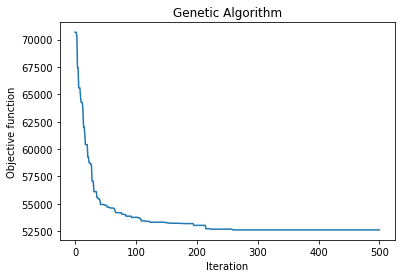

In [ ]:
model.run()

In [ ]:
coefficients = model.output_dict['variable']

In [ ]:
cslr_pred = logreg(X_train_array, coefficients)
cslr_pred[1:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.24518858e-29, 1.03012889e-78, 9.70110376e-48, 1.09629085e-35,
       6.19316395e-38, 1.00000000e+00, 3.70749826e-11, 2.66218130e-26,
       6.63228977e-39])

In [ ]:
cslr_pred = np.round(cslr_pred)

In [ ]:
print(classification_report(y_train, cslr_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8367
           1       0.78      0.39      0.52      1497

    accuracy                           0.89      9864
   macro avg       0.84      0.68      0.73      9864
weighted avg       0.88      0.89      0.87      9864



In [ ]:
cost_per_record = (y_train_array*((cslr_pred*0) + ((1-cslr_pred)*fn_cost_array))) + ((1-y_train_array)*((cslr_pred*fp_cost_array) + ((1-cslr_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

52618.40652809505

In [ ]:
confusion_matrix(y_train, cslr_pred)

array([[8200,  167],
       [ 914,  583]])

In [ ]:
cslr_pred_test = logreg(X_test_array, coefficients)
cslr_pred_test[1:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.95763286e-067, 3.41748672e-055, 5.55980236e-001, 2.24312262e-171,
       2.98961711e-031, 3.03780658e-049, 1.50786151e-032, 1.00000000e+000,
       5.34714341e-043])

In [ ]:
cslr_pred_test = np.round(cslr_pred_test)

In [ ]:
cost_per_record = (y_test_array*((cslr_pred_test*0) + ((1-cslr_pred_test)*fn_cost_array_test))) + ((1-y_test_array)*((cslr_pred_test*fp_cost_array_test) + ((1-cslr_pred_test)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

16842.54181007199

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_model = dtc.fit(X_train, y_train)

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
dt_pred.shape

(2466,)

In [ ]:
cost_per_record = (y_test_array*((dt_pred*0) + ((1-dt_pred)*fn_cost_array_test))) + ((1-y_test_array)*((dt_pred*fp_cost_array_test) + ((1-dt_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

18637.141633255

In [ ]:
dt_pred[1:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.55      0.57      0.56       411

    accuracy                           0.85      2466
   macro avg       0.73      0.74      0.73      2466
weighted avg       0.85      0.85      0.85      2466



In [ ]:
cost_per_record = (y_test_array*((dt_pred*0) + ((1-dt_pred)*fn_cost_array_test))) + ((1-y_test_array)*((dt_pred*fp_cost_array_test) + ((1-dt_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

18637.141633255

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight = "balanced_subsample")

In [ ]:
rfc_model = rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc_model.predict(X_train)

In [ ]:
cost_per_record = (y_train_array*((rfc_pred*0) + ((1-rfc_pred)*fn_cost_array))) + ((1-y_train_array)*((rfc_pred*fp_cost_array) + ((1-rfc_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

47.12893197

In [ ]:
print(classification_report(y_train, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8367
           1       1.00      1.00      1.00      1497

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



In [ ]:
rfc_pred_test = rfc_model.predict(X_test)

In [ ]:
cost_per_record = (y_test_array*((rfc_pred_test*0) + ((1-rfc_pred_test)*fn_cost_array_test))) + ((1-y_test_array)*((rfc_pred_test*fp_cost_array_test) + ((1-rfc_pred_test)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

14279.072809600993

In [ ]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.75      0.49      0.59       411

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.76      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
class_weight= ["balanced", "balanced_subsample"]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap, 
               'class_weight': class_weight}

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc_cv = RandomizedSearchCV(rfc,  param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
rfc_model = rfc_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


In [ ]:
rfc_model.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
rfc_model.best_estimator_.score(X_train, y_train)

0.9746553122465531

In [ ]:
y_pred = rfc_model.best_estimator_.predict(X_test)

In [ ]:
cost_per_record = (y_test_array*((y_pred*0) + ((1-y_pred)*fn_cost_array_test))) + ((1-y_test_array)*((y_pred*fp_cost_array_test) + ((1-y_pred)*0)))

In [ ]:
(1*sum(list(cost_per_record)))

14429.901168168

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2055
           1       0.64      0.70      0.67       411

    accuracy                           0.88      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.89      0.88      0.89      2466

